In [114]:
import pandas as pd
import seaborn as sns

In [92]:
fert = pd.read_csv('./data/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('./data/gapminder_lifeexpectancy.xlsx', index_col=0, nrows=260)
population = pd.read_excel('./data/gapminder_population.xlsx', index_col=0)

In [93]:
life.columns = life.columns.astype(int)
fert.columns = fert.columns.astype(int)

In [94]:
fert.index.name = 'country'
life.index.name = 'country'
population.index.name = 'country'

In [95]:
fert = fert.reset_index()
life = life.reset_index()
population = population.reset_index()

In [96]:
fert

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.93,5.91,5.88,5.85,5.81,5.77,5.73,5.69,5.64,5.59
257,Zimbabwe,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,...,3.94,3.90,3.85,3.79,3.72,3.64,3.56,3.49,3.41,3.35
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
life = life.melt(id_vars='country', var_name='year', value_name='life_expectency')
population = population.melt(id_vars='country', var_name='year', value_name='population')

In [98]:
fert

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35
56158,Åland,2015,NaN


In [99]:
df = fert.merge(population)
df = df.merge(life)

In [100]:
df.dropna(inplace=True)

In [101]:
df = df[df["year"] > 1960]

In [102]:
df

,country,year,fertility_rate,population,life_expectency
6735,Afghanistan,1961,7.67,9164945.0,32.47
6737,Albania,1961,6.08,1685901.0,63.92
6738,Algeria,1961,7.65,11404859.0,48.02
6741,Angola,1961,7.35,5367287.0,36.53
6743,Antigua and Barbuda,1961,4.39,55403.0,63.46
...,...,...,...,...,...
20969,Vietnam,2015,1.70,93447601.0,75.40
20970,Virgin Islands (U.S.),2015,2.45,106291.0,80.60
20973,Yemen,2015,3.83,26832215.0,66.00
20975,Zambia,2015,5.59,16211767.0,56.70


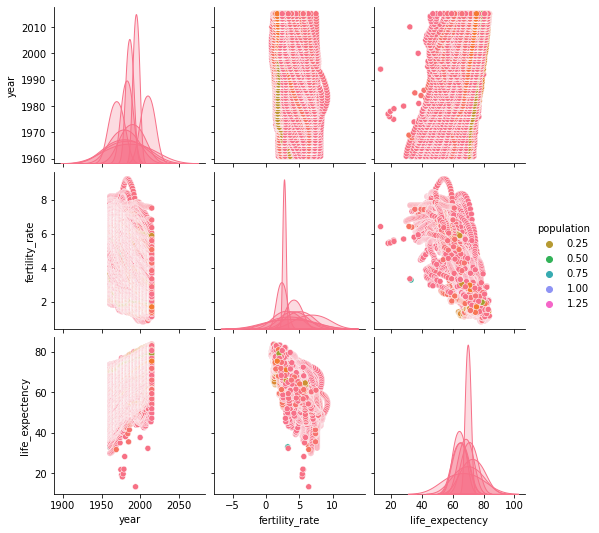

In [116]:
sns.pairplot(df, hue='population', diag_kind="kde", kind="scatter", palette="husl")

In [103]:
# df.index

In [104]:
# df_melted = df.pivot(columns="year")
# df_melted

In [105]:
# df_melted2 = df.pivot(index=["year", "country"], columns=["fertility_rate", "population", "life_expectency"])
# df_melted2

In [106]:
# df_melted3 = df.pivot(index=["year", "country"], columns=["fertility_rate"])
# df_melted3

In [108]:
# df_melted4 = df.pivot(index=["year"], columns=["country"])
# df_melted4

In [109]:
# df_melted4.index

In [110]:
# df_temp = df
# df_temp.index.name = "index"
# df_temp.reset_index(inplace=True)
# df_temp.pivot(index=["index", "country"], values=[""])
# # df_melted5 = df.pivot(index=[""])

In [111]:
# df_staked = df.stack()
# df_staked

In [112]:
# df_staked.index

In [32]:
# # libraries
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

In [33]:
# # Dataset
# df=pd.DataFrame({'X': df['life_expectency'], 'Y': df['fertility_rate'], 'Z': df['population']})

In [34]:
# # plot
# fig = plt.figure()
# fig.add_subplot
# # ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(projection='3d')
# ax.scatter(df['X'], df['Y'], df['Z'], c='skyblue', s=60)
# # ax.view_init(30, 185)
# ax.view_init(0, 0)
# plt.show()

## Pivoting table

In [56]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [57]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [58]:
df.pivot(index='foo', columns='bar')

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [59]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t